# SMS data

Methods:
1. Mutual Information
2. Chi2 test
3. Random Forest features importance
4. Boruta (with Random Forest) + removing correlated features

For each method, a Naive Bayes classifier was trained on the selected features and the accuracy was calculated. This model was chosen after performing initial experiments to compare different models.

Finally, for each method, different number of features was considered and then the best was selected manually based on accuracy plots.

Settings for Naive Bayes models (same for all methods).

In [1]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB
model_params_dict = {}

All functions and experiments parameters.

In [2]:
from utils import *

desired_features = 100
features_min = 50
features_max = 250
step = 1

dataset_name = 'sms'
model_name = 'NB'

Load and split data.

In [3]:
X_train, X_valid, y_train, y_valid, sms_test = load_sms()
print(f'There are {X_train.shape[1]} features in the dataset')
X_train.head()

There are 7005 features in the dataset


,00,000,000pes,008704050406,0121,01223585236,01223585334,02,0207,02073162414,...,zed,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Store best results for each method.

In [4]:
final_results = []

## Mutual information

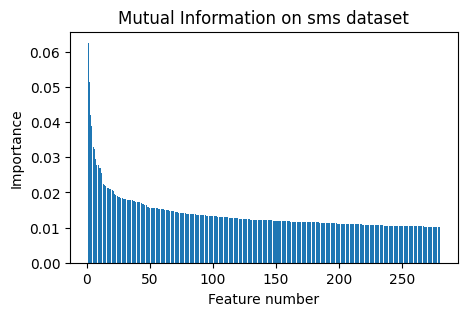

100%|██████████| 200/200 [00:08<00:00, 23.75it/s]


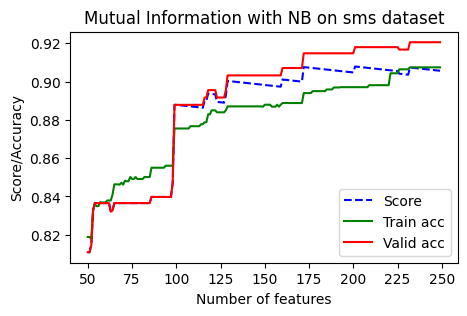

In [5]:
method_name = 'Mutual Information'
importances = get_importance_mutual_information(X_train, y_train)
plot_first_k_percent_importances(importances, f'{method_name} on {dataset_name} dataset', 4)
results_df = get_results_df_by_features(importances, model, model_params_dict, 
                                        X_train, y_train, X_valid, y_valid, 
                                        desired_features, features_min, features_max, step)
make_plot_by_features(results_df, f'{method_name} with {model_name} on {dataset_name} dataset')

In [6]:
min_features = 100
max_features = 150

final_results.append(print_results_for_specific_features(results_df, min_features, max_features, method_name))

    Features     Score  Train acc  Valid acc
79       129  0.900334   0.887051   0.903234


## Chi2 test

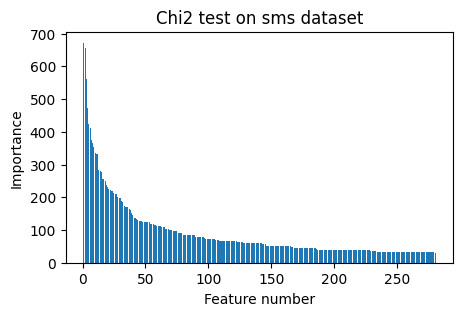

100%|██████████| 200/200 [00:07<00:00, 27.63it/s]


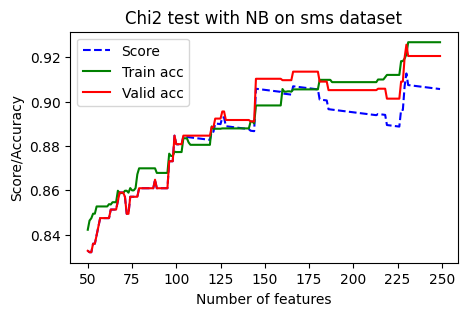

In [7]:
method_name = 'Chi2 test'
importances = get_importance_chi2(X_train, y_train)
plot_first_k_percent_importances(importances, f'{method_name} on {dataset_name} dataset', 4)
results_df = get_results_df_by_features(importances, model, model_params_dict, 
                                        X_train, y_train, X_valid, y_valid, 
                                        desired_features, features_min, features_max, step)
make_plot_by_features(results_df, f'{method_name} with {model_name} on {dataset_name} dataset')

In [8]:
min_features = 125
max_features = 160

final_results.append(print_results_for_specific_features(results_df, min_features, max_features, method_name))

    Features     Score  Train acc  Valid acc
95       145  0.905789   0.898258   0.910289


## Random Forest features importance

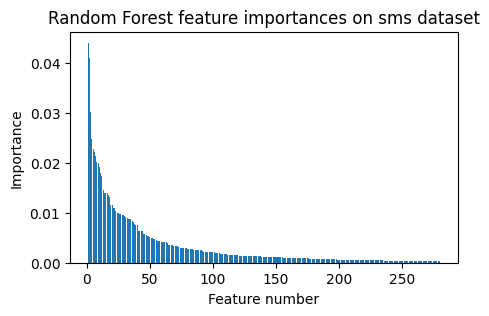

100%|██████████| 300/300 [00:13<00:00, 22.38it/s]


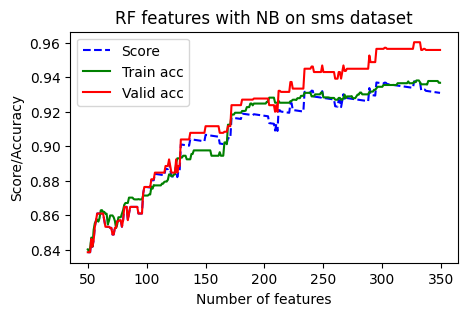

In [9]:
method_name = 'Random Forest'
importances = get_importance_random_forest(X_train, y_train)
plot_first_k_percent_importances(importances, f'{method_name} feature importances on {dataset_name} dataset', k=4)
results_df = get_results_df_by_features(importances, model, model_params_dict, 
                                        X_train, y_train, X_valid, y_valid, 
                                        desired_features, features_min, features_max+100, step)
make_plot_by_features(results_df, f'RF features with {model_name} on {dataset_name} dataset')

In [10]:
min_features = 150
max_features = 250

final_results.append(print_results_for_specific_features(results_df, min_features, max_features, method_name))

     Features     Score  Train acc  Valid acc
190       240  0.932178   0.928841   0.946178


## Boruta

Number of selected features: 144


100%|██████████| 21/21 [00:00<00:00, 30.33it/s]


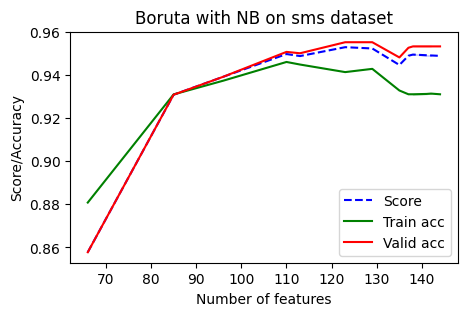

In [11]:
method_name = 'Boruta'
importances = get_importance_boruta(X_train, y_train)
results_df = get_results_df_by_features_boruta(importances, model, model_params_dict, 
                                        X_train, y_train, X_valid, y_valid, 
                                        desired_features, features_min, features_max, step)
make_plot_by_features(results_df, f'{method_name} with {model_name} on {dataset_name} dataset')

In [12]:
min_features = 100
max_features = 130

final_results.append(print_results_for_specific_features(results_df, min_features, max_features, method_name))

   Features     Score  Train acc  Valid acc
5       123  0.952869   0.941309   0.955169


# Summary

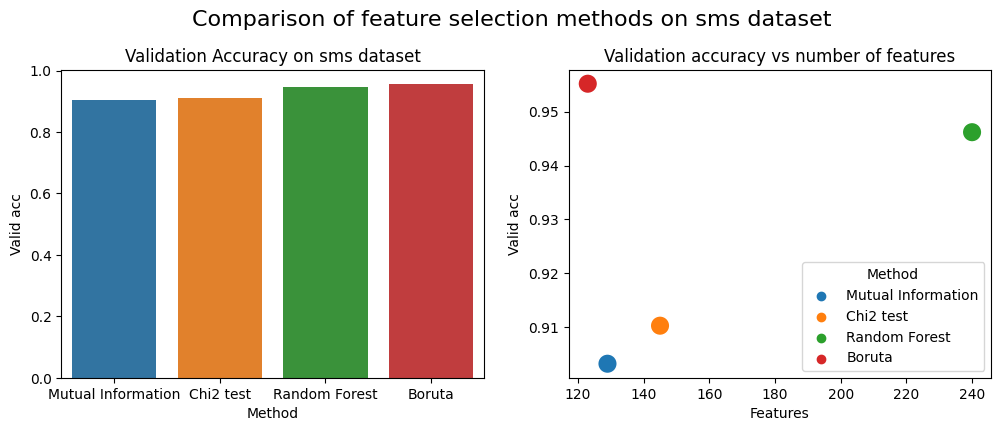

In [13]:
plot_summary(final_results, dataset_name)

# Saving predictions

For Boruta - the fewest features with high accuracy.

In [14]:
save_predictions(final_results, 'Boruta', dataset_name, sms_test)

Predictions saved to file
Features saved to file (there are 123 features):
['000' '100' '1000' '10p' '150p' '150ppm' '16' '18' '1st' '2000' '250'
 '50' '500' '5000' 'am' 'apply' 'at' 'award' 'awarded' 'box' 'but' 'call'
 'camera' 'can' 'cash' 'chance' 'chat' 'claim' 'co' 'code' 'com' 'come'
 'contact' 'cost' 'cs' 'customer' 'dating' 'did' 'do' 'draw' 'entry'
 'every' 'find' 'for' 'free' 'from' 'get' 'going' 'got' 'gt' 'guaranteed'
 'have' 'home' 'how' 'http' 'if' 'in' 'info' 'is' 'it' 'its' 'join'
 'later' 'latest' 'like' 'line' 'live' 'll' 'love' 'ltd' 'me' 'message'
 'min' 'mins' 'mob' 'mobile' 'msg' 'my' 'need' 'network' 'new' 'nokia'
 'not' 'now' 'ok' 'on' 'only' 'or' 'our' 'out' 'per' 'please' 'pobox'
 'reply' 'ringtone' 'send' 'sms' 'so' 'sorry' 'stop' 'text' 'that' 'the'
 'this' 'to' 'todays' 'tones' 'txt' 'unsubscribe' 'ur' 'urgent' 'vouchers'
 'was' 'week' 'what' 'when' 'win' 'with' 'wkly' 'word' 'www' 'you' 'your']
